<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🌟 Project on Python 🌟</b></div>

# Problem Statement:

The project aims to leverage Python programming and Spotify data to build a predictive analysis and recommendation system for music tracks. The dataset includes information on track details, artists, release date, Spotify metrics, and other relevant features.

# Key Objective:

Predictive Analysis: Develop predictive models to analyze and predict Spotify metrics such as streams, popularity, and inclusions in playlists and charts based on track and artist attributes.

Feature Engineering: Engineer relevant features from the given dataset to enhance the predictive power of the models. Consider factors such as artist count, release date, and musical attributes like tempo, key, and danceability.

Recommendation System: Implement a recommendation system that suggests tracks to users based on their historical preferences, incorporating machine learning algorithms to enhance the accuracy of recommendations.

Exploratory Data Analysis (EDA): Conduct EDA to understand the distribution of Spotify metrics, track popularity, and the impact of various features on the performance of music tracks.

Model Evaluation: Evaluate the performance of predictive models using appropriate metrics such as Mean Squared Error (MSE), accuracy, and precision-recall.

Visualization: Create visualizations to present insights gained from the analysis, showcasing trends, correlations, and the impact of different features on the popularity and streams of tracks.

# Key chalenges:

Sparse Data: Handle sparse data and missing values in certain features to ensure the robustness of predictive models.

Temporal Dynamics: Explore and model temporal dynamics to account for trends and changes in user preferences over time.

Multivariate Analysis: Address the complexity of multivariate analysis when considering the impact of various features on Spotify metrics.

# Expected Outcomes:

A predictive model that accurately forecasts Spotify metrics for tracks based on their attributes.

A recommendation system that provides personalized suggestions to users, enhancing user engagement with the platform.

Insights into the key factors influencing the popularity and inclusion of tracks in playlists and charts.

Visualizations that effectively communicate trends and patterns in the Spotify data.

# IMPORT NECCESARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# READ THE DATASET

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\spotify-2023.csv",encoding='latin-1')

# Data Exploration

In [7]:
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [9]:
df.shape

(953, 24)

In [11]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

# Indexing and Selection:

In [12]:
# Indexing and Selection:
# Assuming 'df' is our DataFrame.
# df[column]: Select a single column by name.
# df[[column1, column2]]: Select multiple columns by name.
# df.iloc[row, column]: Select data by integer-based location.
# df.loc[row_label, column_label]: Select data by label-based location

In [13]:
# Select a single column by name
single_column = df['track_name']
print(single_column)

0      Seven (feat. Latto) (Explicit Ver.)
1                                     LALA
2                                  vampire
3                             Cruel Summer
4                           WHERE SHE GOES
                      ...                 
948                           My Mind & Me
949              Bigger Than The Whole Sky
950                   A Veces (feat. Feid)
951                          En La De Ella
952                                  Alone
Name: track_name, Length: 953, dtype: object


In [14]:
# Select multiple columns by name
multiple_columns = df[['track_name', 'artist(s)_name']]
print(multiple_columns)

                              track_name      artist(s)_name
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook
1                                   LALA         Myke Towers
2                                vampire      Olivia Rodrigo
3                           Cruel Summer        Taylor Swift
4                         WHERE SHE GOES           Bad Bunny
..                                   ...                 ...
948                         My Mind & Me        Selena Gomez
949            Bigger Than The Whole Sky        Taylor Swift
950                 A Veces (feat. Feid)  Feid, Paulo Londra
951                        En La De Ella  Feid, Sech, Jhayco
952                                Alone           Burna Boy

[953 rows x 2 columns]


In [15]:
# Select data by integer-based location using .iloc
# Here, we're selecting the first row and the second column
data_at_location = df.iloc[0, 1]
print(data_at_location)

Latto, Jung Kook


In [16]:
# Select data by label-based location using .loc
# Here, we're selecting the value at the first row and 'track_name' column
data_at_label = df.loc[0, 'track_name']
print(data_at_label)

Seven (feat. Latto) (Explicit Ver.)


In [22]:
# Selecting rows based on a condition
# Example: Select songs released in 2023
songs_2023 = df[df['released_year'] == 2023]
print(songs_2023)

In [52]:
# Selecting rows based on multiple conditions
# Example: Select songs with danceability above 70% and valence below 50%
selected_songs = df[(df['danceability_%'] > 70) & (df['valence_%'] < 50)]
selected_songs

track_name                       artist(s)_name  artist_count  \
8           fukumean                                Gunna             1   
30              Rush                          Troye Sivan             1   
32          Creepin'  The Weeknd, 21 Savage, Metro Boomin             3   
50          El Cielo     Feid, Myke Towers, Sky Rompiendo             3   
58               S91                              Karol G             1   
..               ...                                  ...           ...   
934     Question...?                         Taylor Swift             1   
935            On BS                     Drake, 21 Savage             2   
937       Circo Loco                     Drake, 21 Savage             2   
939      Spin Bout U                     Drake, 21 Savage             2   
945  BackOutsideBoyz                                Drake             1   

     released_year  released_month  released_day  in_spotify_playlists  \
8             2023               5            15                  1096   
30            2023               7            13                   864   
32            2022              12             2                  6036   
50            2023               6             2                  1298   
58            2023               7            14                   525   
..             ...             ...           ...                   ...   
934           2022              10            21                  1608   
935           2022              11             4                  1338   
937           2022              11             4                  1794   
939           2022              11             4                  1652   
945           2022              11             4                  1045   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
8                   83   95217315                  60  ...  130   C#  Minor   
30                  78   22581161                  71  ...  126    F  Minor   
32                  88  843957510                 113  ...   98   C#  Minor   
50                  38  107753850                  44  ...  106   A#  Minor   
58                  41   16011326                  34  ...  128  NaN  Minor   
..                 ...        ...                 ...  ...  ...  ...    ...   
934                  0  223064273                  10  ...  109    G  Major   
935                  0  170413877                   9  ...  158    A  Major   
937                  0  141720999                  26  ...  104   C#  Major   
939                  2  198365537                  26  ...  130    G  Major   
945                  0   93367537                   8  ...  142    F  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
8               85         22       62             12                   0   
30              74         35       84              0                   0   
32              71         17       61             36                   0   
50              72         17       64              7                   0   
58              86         42       72             59                   0   
..             ...        ...      ...            ...                 ...   
934             75         11       50             20                   0   
935             84         33       36              2                   0   
937             73         25       61              1                   0   
939             77         20       70              1                   0   
945             85         40       43              4                   0   

     liveness_%  speechiness_%  
8            28              9  
30           11              6  
32            8              5  
50           10              5  
58            9             19  
..          ...            ...  
934          30             17  
935          39             59  
937          32              7  
939          16 

In [25]:
# Using boolean indexing to update values
# Example: Update valence percentage for songs released in 2023 to 60%
df.loc[df['released_year'] == 2023, 'valence_%'] = 60

In [28]:
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         60       83             31                   0   
1             71         60       74              7                   0   
2             51         60       53             17                   0   
3             55         58       72             11                   0   
4             65         60       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [27]:
# Selecting specific rows and columns
# Example: Select the first 5 rows and columns 'track_name' and 'streams'
selected_data = df.loc[0:4, ['track_name', 'streams']]
print(selected_data)

                            track_name    streams
0  Seven (feat. Latto) (Explicit Ver.)  141381703
1                                 LALA  133716286
2                              vampire  140003974
3                         Cruel Summer  800840817
4                       WHERE SHE GOES  303236322


In [30]:
# Using .isin() to filter rows based on multiple values
# Example: Select songs by specific artists
selected_artists = df[df['artist(s)_name'].isin(['Taylor Swift', 'The Weeknd'])]
print(selected_artists)

In [34]:
# Filtering rows based on string methods
# Example: Select songs with 'feat.' in the track name
feat_songs = df[df['track_name'].str.contains('feat.', case=False)]
feat_songs.head()

track_name  \
0       Seven (feat. Latto) (Explicit Ver.)   
36           Frï¿½ï¿½gil (feat. Grupo Front   
62  Left and Right (Feat. Jung Kook of BTS)   
77                Unholy (feat. Kim Petras)   
95              All My Life (feat. J. Cole)   

                           artist(s)_name  artist_count  released_year  \
0                        Latto, Jung Kook             2           2023   
36  Yahritza Y Su Esencia, Grupo Frontera             2           2023   
62           Charlie Puth, BTS, Jung Kook             3           2022   
77                  Sam Smith, Kim Petras             2           2022   
95                      J. Cole, Lil Durk             2           2023   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
0                7            14                   553                147   
36               4             7                   672                 34   
62               6            24                  3107                 39   
77               9            22                  8576                 42   
95               5            12                  2175                 23   

       streams  in_apple_playlists  ...  bpm key   mode danceability_%  \
0    141381703                  43  ...  125   B  Major             80   
36   188933502                  19  ...  150  F#  Major             61   
62   720434240                  38  ...  101   D  Major             88   
77  1230675890                 216  ...  131   D  Major             71   
95   144565150                  69  ...  143  D#  Major             83   

    valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
0          60       83             31                   0           8   
36         60       73             37                   0          11   
62         72       59             62                   0           9   
77         24       47              1                   0          27   
95         60       44             15                   0          10   

    speechiness_%  
0               4  
36              3  
62              3  
77              9  
95             33  

[5 rows x 24 columns]

In [36]:
# Sorting the DataFrame by a specific column
# Example: Sort the DataFrame by 'streams' in descending order
sorted_df = df.sort_values(by='streams', ascending=False)
sorted_df.head()

track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   
33                             Anti-Hero       Taylor Swift             1   
625                               Arcade    Duncan Laurence             1   
253                        Glimpse of Us               Joji             1   
455                       Seek & Destroy                SZA             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   
33            2022              10            21                  9082   
625           2019               3             7                  6646   
253           2022               6            10                  6330   
455           2022              12             9                  1007   

     in_spotify_charts                                            streams  \
574                  0  BPM110KeyAModeMajorDanceability53Valence75Ener...   
33                  56                                          999748277   
625                  0                                          991336132   
253                  6                                          988515741   
455                  0                                           98709329   

     in_apple_playlists  ...  bpm key   mode danceability_%  valence_%  \
574                  16  ...  110   A  Major             53         75   
33                  242  ...   97   E  Major             64         51   
625                 107  ...   72   A  Minor             45         27   
253                 109  ...  170  G#  Major             44         27   
455                   5  ...  152  C#  Major             65         35   

    energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
574       69              7                   0          17              3  
33        63             12                   0          19              5  
625       33             82                   0          14              4  
253       32             89                   0          14              5  
455       65             44                  18          21              7  

[5 rows x 24 columns]

In [38]:
# Selecting rows based on a condition and specific columns
# Example: Select songs with high energy and speechiness, only show 'track_name' and 'energy_%'
high_energy_speechiness = df[(df['energy_%'] > 80) & (df['speechiness_%'] > 70)][['track_name', 'energy_%']]
high_energy_speechiness

Empty DataFrame
Columns: [track_name, energy_%]
Index: []

# Data Cleaning and Transformation:

In [ ]:
# Data Cleaning and Transformation:
# df.drop(labels, axis): Remove rows or columns.
# df.fillna(value): Fill missing values with a specified value.
# df.dropna(): Remove rows with missing values.
# df.rename(columns): Rename columns.
# df.sort_values(by): Sort DataFrame by column(s).
# df.groupby(column): Group data based on a column.
# df.pivot_table(): Create a pivot table.

In [71]:
# Remove specific columns
# columns_to_drop = ['in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
# df = df.drop(columns=columns_to_drop)
df=df.drop(columns={'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'},axis=1)
df.head(2)

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
0                147  141381703                  43  ...  125    B  Major   
1                 48  133716286                  48  ...   92   C#  Major   

  danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0             80         89        83              31                   0   
1             71         61        74               7                   0   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  

[2 rows x 21 columns]

In [72]:
# Fill missing values with a specified value (e.g., fill NaNs with 0)
df = df.fillna(value=0)

In [73]:
# Remove rows with missing values
df = df.dropna()

In [83]:
# Rename columns
df = df.rename(columns={'danceability_%': 'danceability_percentage', 'valence_%': 'valence_percentage'})
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts      streams  in_apple_playlists  ...  bpm  key   mode  \
0                147  141381703.0                  43  ...  125    B  Major   
1                 48  133716286.0                  48  ...   92   C#  Major   
2                113  140003974.0                  94  ...  138    F  Major   
3                100  800840817.0                 116  ...  170    A  Major   
4                 50  303236322.0                  84  ...  144    A  Minor   

  danceability_percentage  valence_percentage  energy_%  acousticness_%  \
0                      80                  89        83              31   
1                      71                  61        74               7   
2                      51                  32        53              17   
3                      55                  58        72              11   
4                      65                  23        80              14   

   instrumentalness_%  liveness_%  speechiness_%  
0                   0           8              4  
1                   0          10              4  
2                   0          31              6  
3                   0          11             15  
4                  63          11              6  

[5 rows x 21 columns]

In [59]:
# Sort DataFrame by a specific column
df = df.sort_values(by='streams', ascending=False)

In [74]:
# Convert 'streams' column to numeric, coerce errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [65]:
# Check data types again
df.dtypes

track_name                  object
artist(s)_name              object
artist_count                 int64
released_year                int64
released_month               int64
released_day                 int64
in_spotify_playlists         int64
in_spotify_charts            int64
streams                    float64
in_apple_playlists           int64
in_apple_charts              int64
bpm                          int64
key                         object
mode                        object
danceability_percentage      int64
valence_percentage           int64
energy_%                     int64
acousticness_%               int64
instrumentalness_%           int64
liveness_%                   int64
speechiness_%                int64
dtype: object

In [67]:
# Create a pivot table
pivot_table = pd.pivot_table(df, values='streams', index='released_year', columns='mode', aggfunc='sum')
pivot_table

mode                  Major         Minor
released_year                            
1930                    NaN  9.059852e+07
1942           3.955914e+08           NaN
1946           3.897720e+08           NaN
1950           4.732483e+08           NaN
1952           3.955914e+08           NaN
1957           9.199620e+08           NaN
1958           1.065212e+09  2.453509e+08
1959           4.463901e+08  1.270277e+08
1963           1.311263e+09           NaN
1968           1.145728e+09           NaN
1970           5.200345e+08           NaN
1971           4.604928e+08           NaN
1973                    NaN  8.385868e+08
1975           2.009095e+09  2.197011e+09
1979           4.039395e+08           NaN
1982           3.502754e+08           NaN
1983           1.593271e+09           NaN
1984           4.816974e+08  2.989928e+09
1985           1.205952e+09  1.024858e+09
1986           4.295048e+08  7.041711e+08
1987           1.553498e+09           NaN
1991           2.058840e+09           NaN
1992           1.271293e+09           NaN
1994           1.449779e+09           NaN
1995           1.937004e+09           NaN
1996           1.069331e+08           NaN
1997           1.037625e+08           NaN
1998                    NaN  1.284943e+09
1999           3.640853e+09  1.762224e+09
2000           8.852189e+08  3.048755e+09
2002           6.821533e+09  1.858190e+09
2003           3.168043e+09           NaN
2004           2.274159e+09  1.241559e+09
2005           1.805775e+08           NaN
2007           1.217121e+09           NaN
2008                    NaN  2.480816e+09
2010           5.015322e+09  2.554517e+09
2011           6.214305e+09  3.148908e+09
2012           9.685824e+09  3.729519e+09
2013           9.485035e+09  6.377464e+09
2014           1.417538e+10  2.257233e+09
2015           6.020840e+09  4.910095e+09
2016           1.638290e+10  3.860039e+09
2017           1.066212e+10  2.079552e+10
2018           1.245513e+10  2.575390e+09
2019           2.266183e+10  1.520911e+10
2020           1.506998e+10  1.963375e+10
2021           4.695991e+10  2.684819e+10
2022           6.637475e+10  5.002762e+10
2023           1.179423e+10  1.401426e+10

In [68]:
# the code is creating a pivot table from the original DataFrame df where
# the 'streams' column values are aggregated (summed up) based on the combination of 'released_year'
# (used as index) and 'mode' (used as columns). This can be useful for analyzing and comparing 
# streaming counts over different release years and modes (assuming 'mode' is a categorical variable).

# Querying using a SQL-like syntax:

In [81]:
# Querying using a SQL-like syntax:
# df.query('condition'): Query data using a SQL-like syntax.

In [85]:
# Example: Query tracks with danceability percentage greater than 70
high_danceability_tracks = df.query('danceability_percentage > 70')
high_danceability_tracks

track_name         artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)       Latto, Jung Kook             2   
1                                   LALA            Myke Towers             1   
5                               Sprinter      Dave, Central Cee             2   
8                               fukumean                  Gunna             1   
9                        La Bebe - Remix  Peso Pluma, Yng Lvcas             2   
..                                   ...                    ...           ...   
939                          Spin Bout U       Drake, 21 Savage             2   
943                   Privileged Rappers       Drake, 21 Savage             2   
945                      BackOutsideBoyz                  Drake             1   
950                 A Veces (feat. Feid)     Feid, Paulo Londra             2   
951                        En La De Ella     Feid, Sech, Jhayco             3   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
5             2023               6             1                  2186   
8             2023               5            15                  1096   
9             2023               3            17                  2953   
..             ...             ...           ...                   ...   
939           2022              11             4                  1652   
943           2022              11             4                  1007   
945           2022              11             4                  1045   
950           2022              11             3                   573   
951           2022              10            20                  1320   

     in_spotify_charts      streams  in_apple_playlists  ...  bpm  key   mode  \
0                  147  141381703.0                  43  ...  125    B  Major   
1                   48  133716286.0                  48  ...   92   C#  Major   
5                   91  183706234.0                  67  ...  141   C#  Major   
8                   83   95217315.0                  60  ...  130   C#  Minor   
9                   44  553634067.0                  49  ...  170    D  Minor   
..                 ...          ...                 ...  ...  ...  ...    ...   
939                  2  198365537.0                  26  ...  130    G  Major   
943                  0  112436403.0                   6  ...  144    F  Major   
945                  0   93367537.0                   8  ...  142    F  Minor   
950                  0   73513683.0                   2  ...   92   C#  Major   
951                  0  133895612.0                  29  ...   97   C#  Major   

    danceability_percentage  valence_percentage  energy_%  acousticness_%  \
0                        80                  89        83              31   
1                        71                  61        74               7   
5                        92                  66        58              19   
8                        85                  22        62              12   
9                        81                  56        48              21   
..                      ...                 ...       ...             ...   
939                      77                  20        70               1   
943                      93                  62        61               0   
945                      85                  40        43               4   
950                      80                  81        67               4   
951                      82                  67        77               8   

     instrumentalness_%  liveness_%  speechiness_%  
0                     0           8              4  
1                     0          10              4  
5                     0           8             24  
8                     0          28              9  
9    

# Custom Aggregation using GroupBy:

In [88]:
# Example: Aggregate mean energy percentage for each artist
artist_energy_mean = df.groupby('artist(s)_name')['energy_%'].mean()
artist_energy_mean

artist(s)_name
(G)I-DLE                                         87.0
21 Savage, Gunna                                 73.0
24kgoldn, Iann Dior                              72.0
50 Cent                                          71.0
A$AP Rocky, Metro Boomin, Roisee                 53.0
                                                 ... 
j-hope                                           72.0
j-hope, J. Cole                                  82.0
sped up 8282                                     73.0
sped up nightcore, ARIZONATEARS, Lil Uzi Vert    90.0
teto                                             50.0
Name: energy_%, Length: 645, dtype: float64

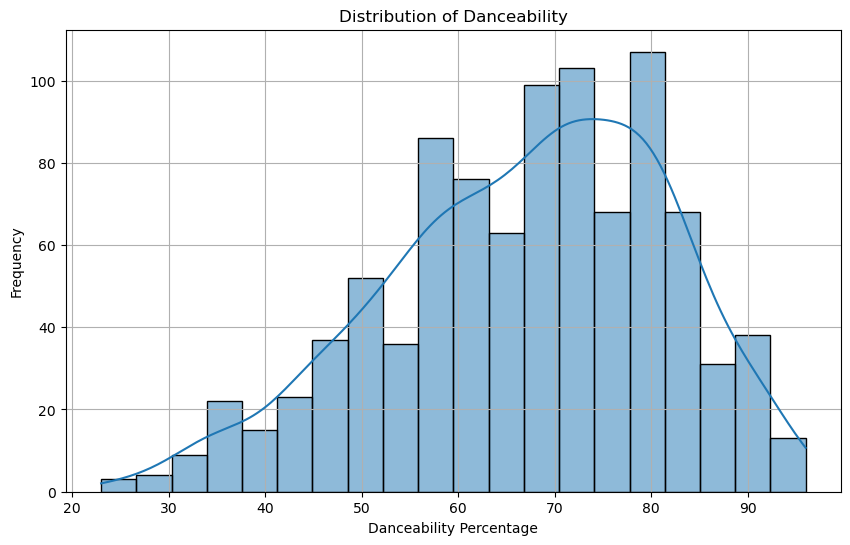

In [75]:
# Example 1: Distribution of Danceability
plt.figure(figsize=(10, 6))
sns.histplot(df['danceability_%'], bins=20, kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability Percentage')
plt.ylabel('Frequency')
plt.grid()
plt.show()

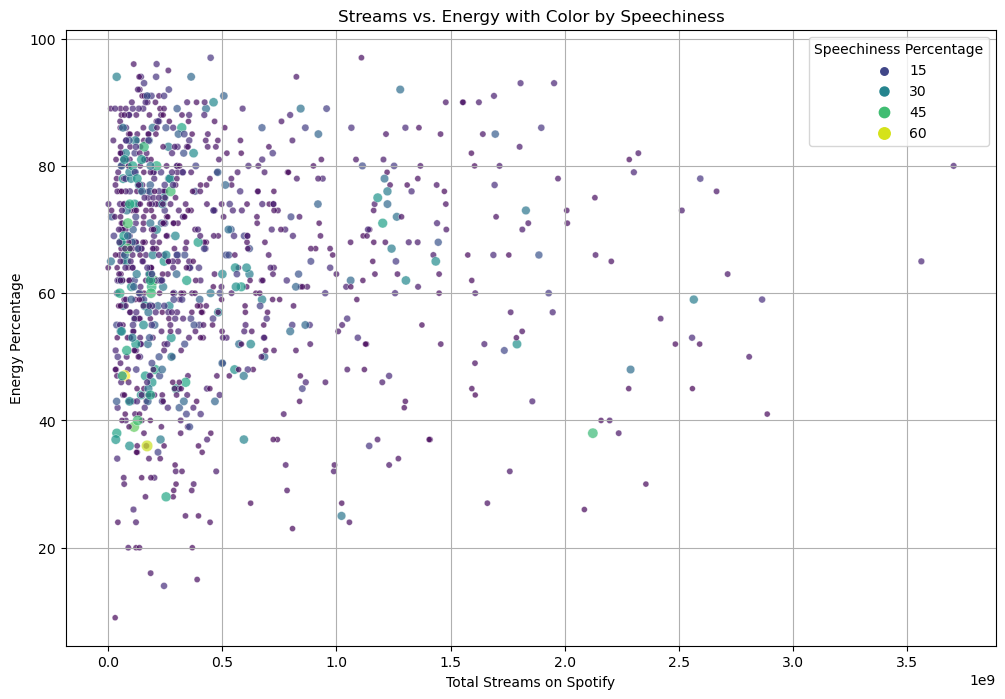

In [76]:
# Example 2: Scatter plot for Streams vs. Energy with color by Speechiness
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='streams', y='energy_%', hue='speechiness_%', size='speechiness_%', palette='viridis', alpha=0.7)
plt.title('Streams vs. Energy with Color by Speechiness')
plt.xlabel('Total Streams on Spotify')
plt.ylabel('Energy Percentage')
plt.legend(title='Speechiness Percentage')
plt.grid()
plt.show()

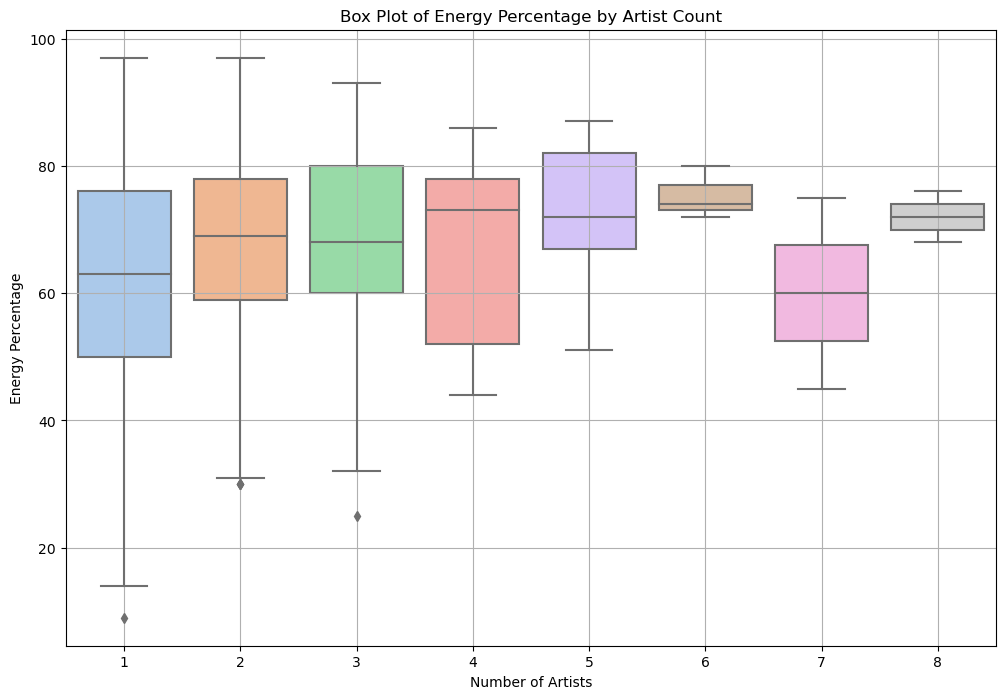

In [77]:
# Example 3: Box plot for Energy percentage by Artist Count
plt.figure(figsize=(12, 8))
sns.boxplot(x='artist_count', y='energy_%', data=df, palette='pastel')
plt.title('Box Plot of Energy Percentage by Artist Count')
plt.xlabel('Number of Artists')
plt.ylabel('Energy Percentage')
plt.grid()
plt.show()

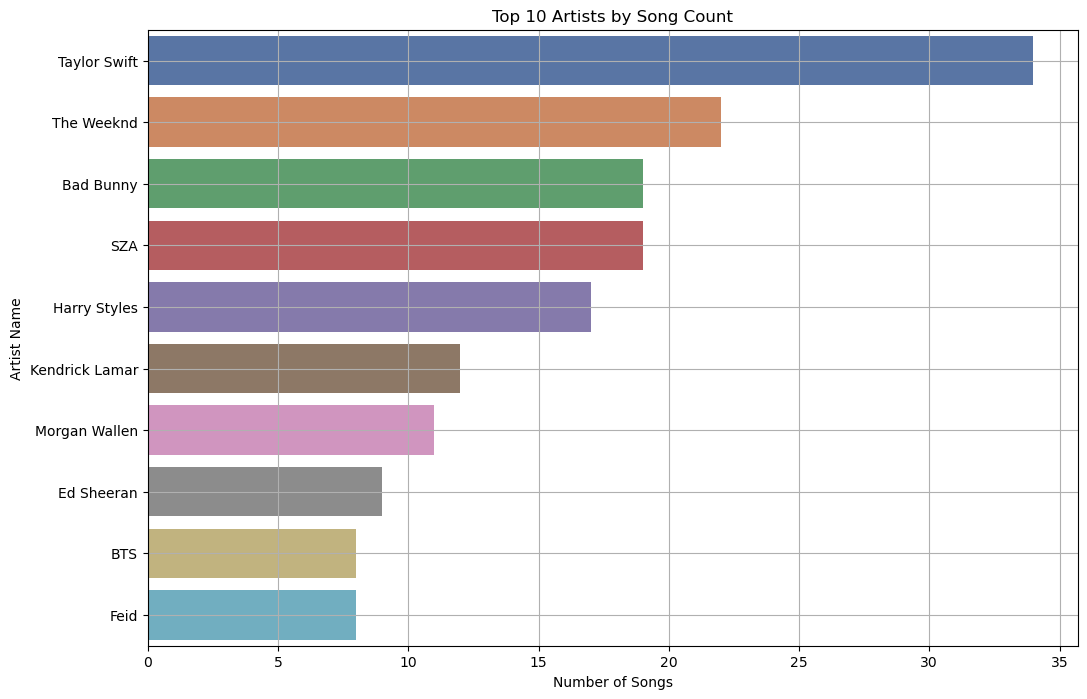

In [78]:
# Example 4: Countplot for the Top 10 Artists
top_artists = df['artist(s)_name'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='deep')
plt.title('Top 10 Artists by Song Count')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.grid()
plt.show()

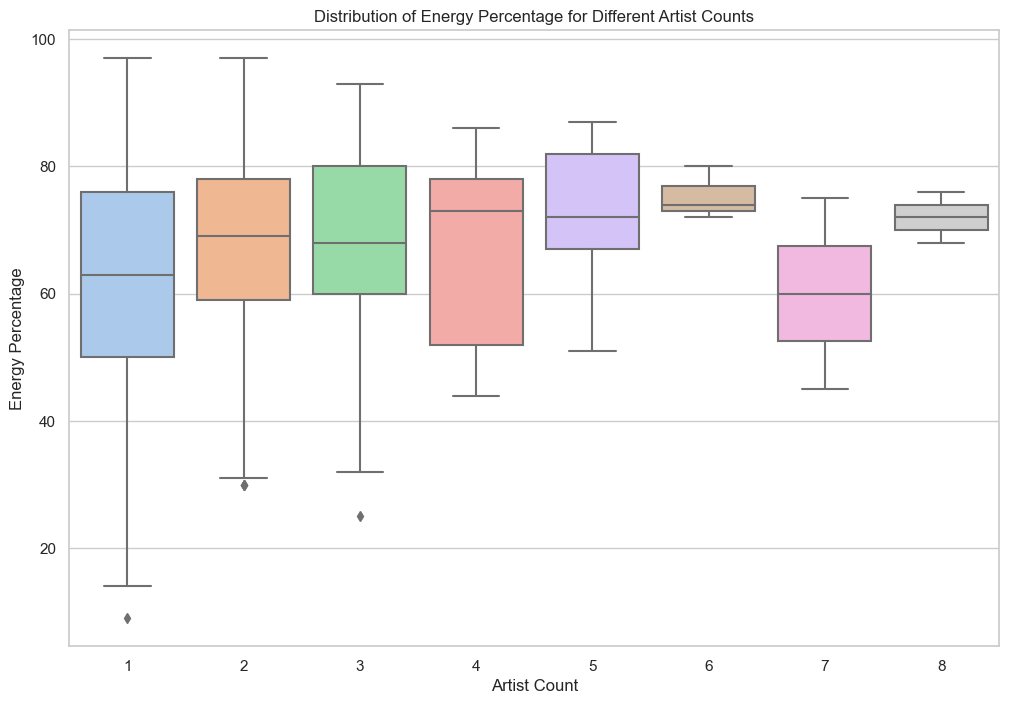

In [79]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Visualize the distribution of 'energy_%' for different 'artist_count'
plt.figure(figsize=(12, 8))
sns.boxplot(x='artist_count', y='energy_%', data=df, palette='pastel')
plt.title('Distribution of Energy Percentage for Different Artist Counts')
plt.xlabel('Artist Count')
plt.ylabel('Energy Percentage')
plt.show()

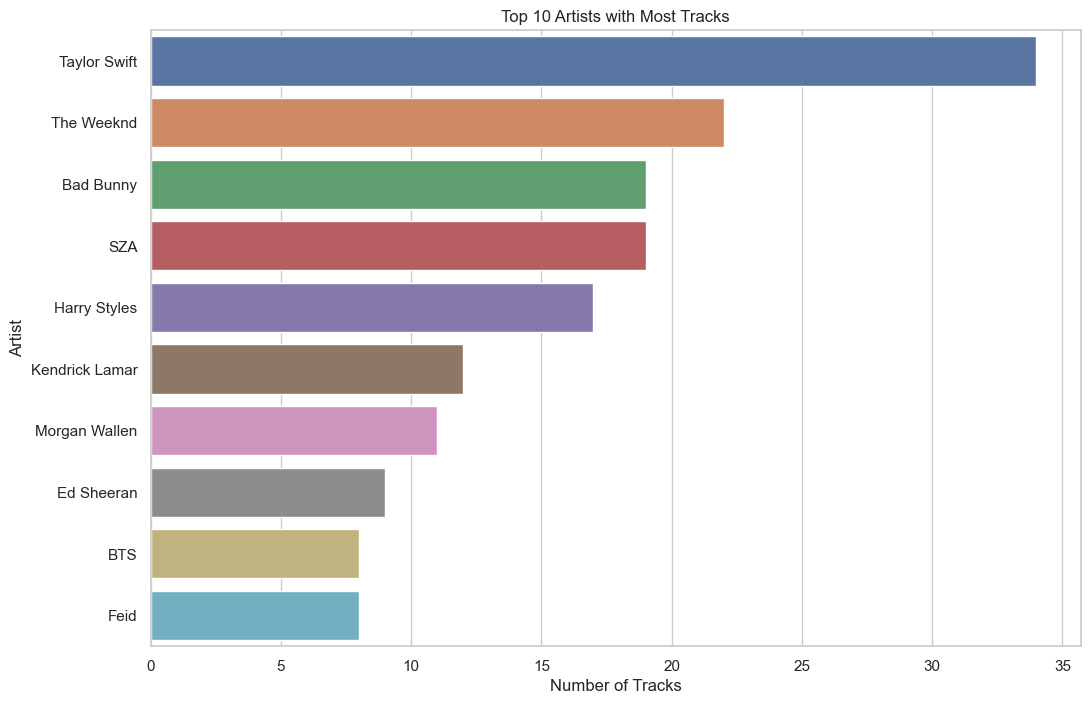

In [80]:
# Visualize the top artists based on the number of tracks
top_artists = df['artist(s)_name'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='deep')
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

# Data Visualization:

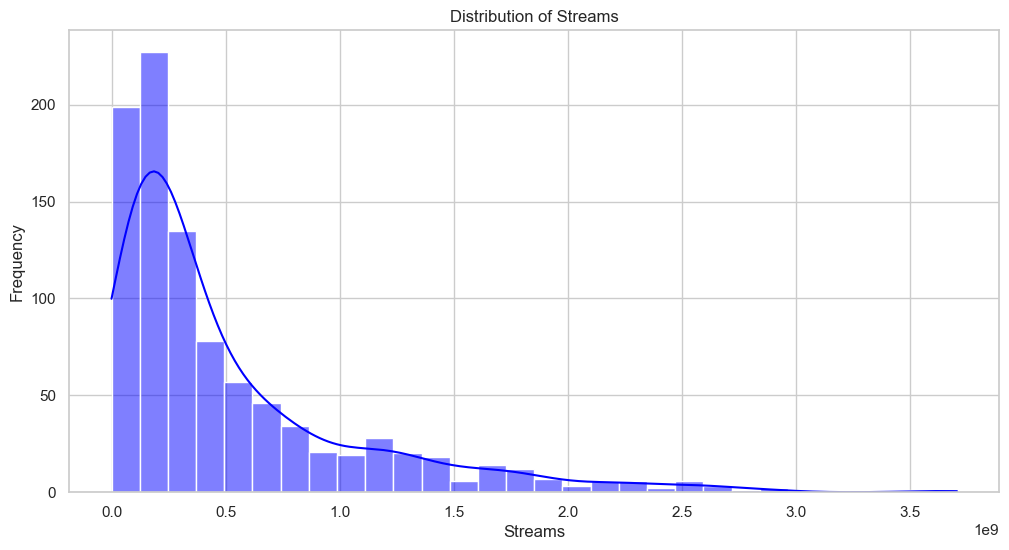

In [91]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Visualization 1: Distribution of Streams
plt.figure(figsize=(12, 6))
sns.histplot(df['streams'].dropna(),kde=True,  color='blue', bins=30)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

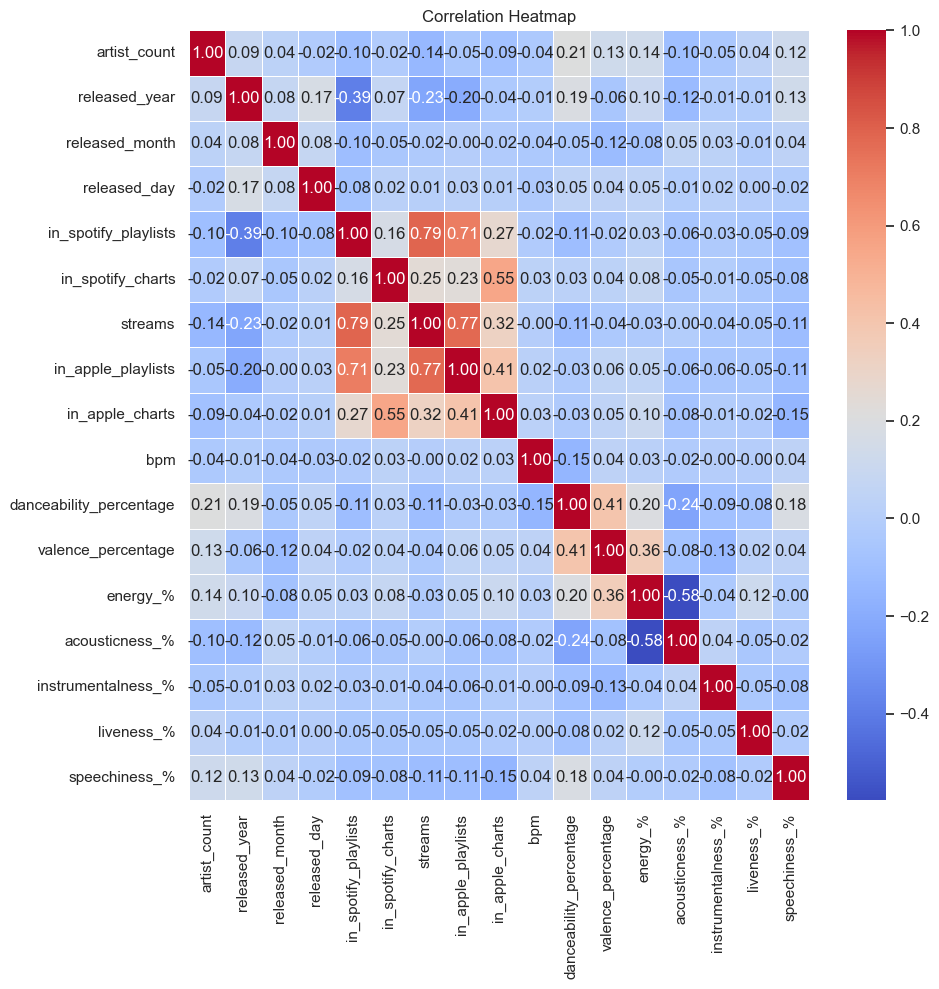

In [96]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])
# numeric_df
# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.5,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

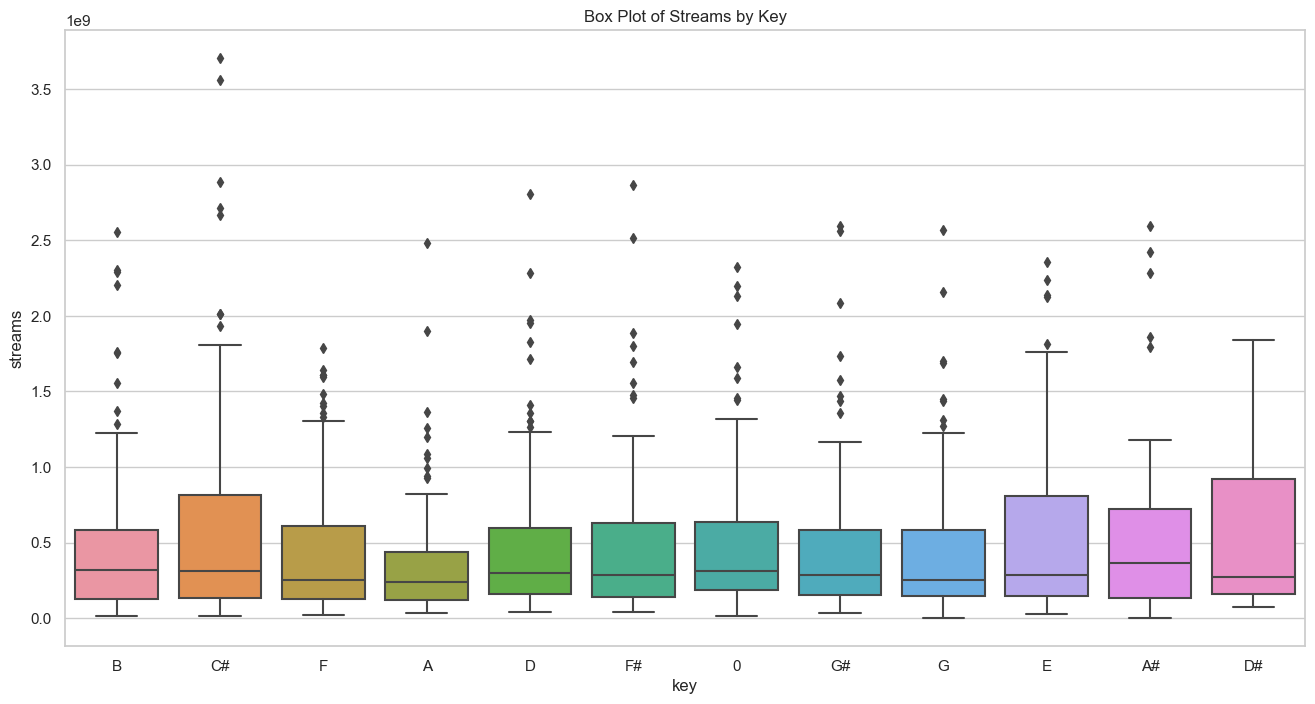

In [97]:
# Visualization 3: Box Plot
plt.figure(figsize=(16, 8))
sns.boxplot(x='key', y='streams', data=df)
plt.title('Box Plot of Streams by Key')
plt.show()

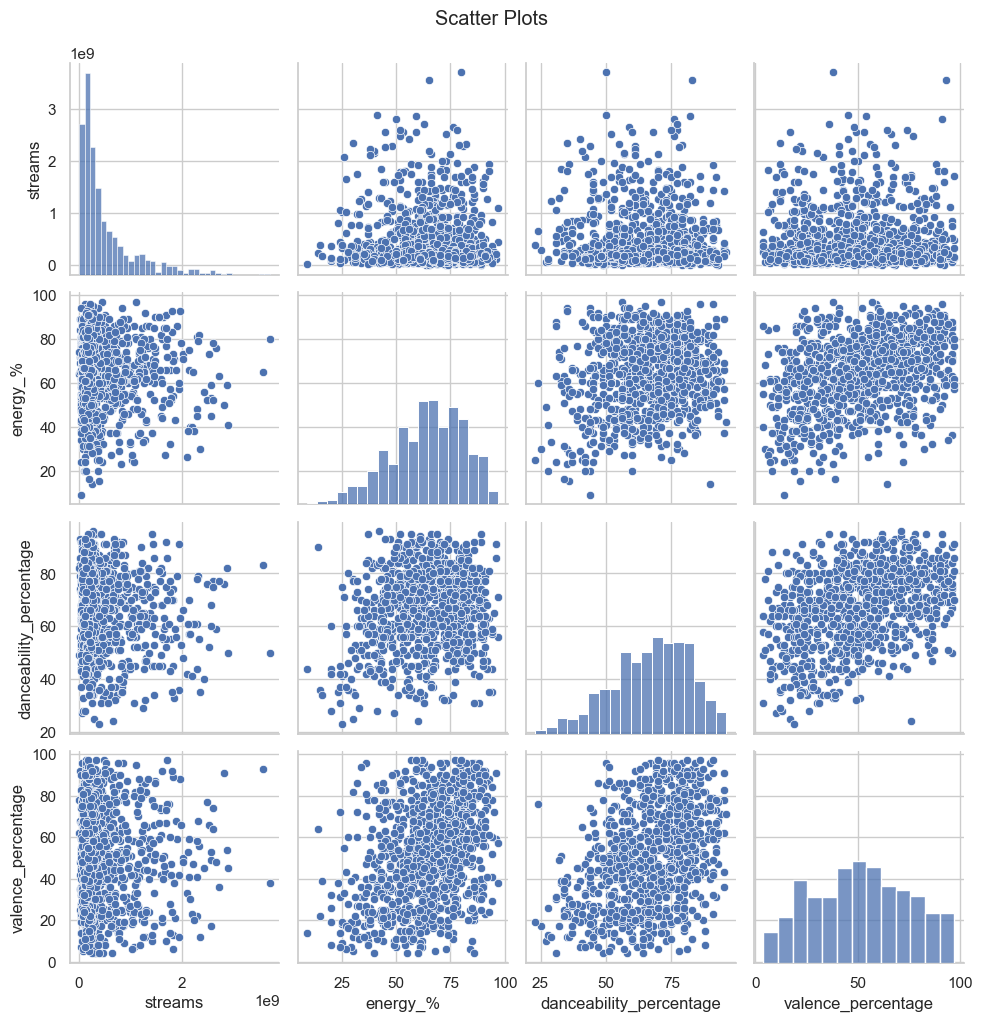

In [98]:
# Visualization 4: Scatter Plots
sns.pairplot(df[['streams', 'energy_%', 'danceability_percentage', 'valence_percentage']])
plt.suptitle('Scatter Plots', y=1.02)
plt.show()

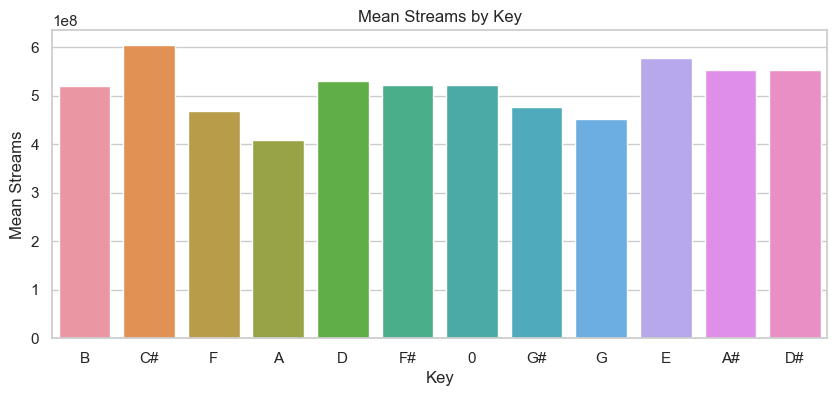

In [104]:
# Visualization: Bar Plot (for example, by Key)
plt.figure(figsize=(10, 4))
sns.barplot(x='key', y='streams', data=df, errorbar=None)
plt.title('Mean Streams by Key')
plt.xlabel('Key')
plt.ylabel('Mean Streams')
plt.show()

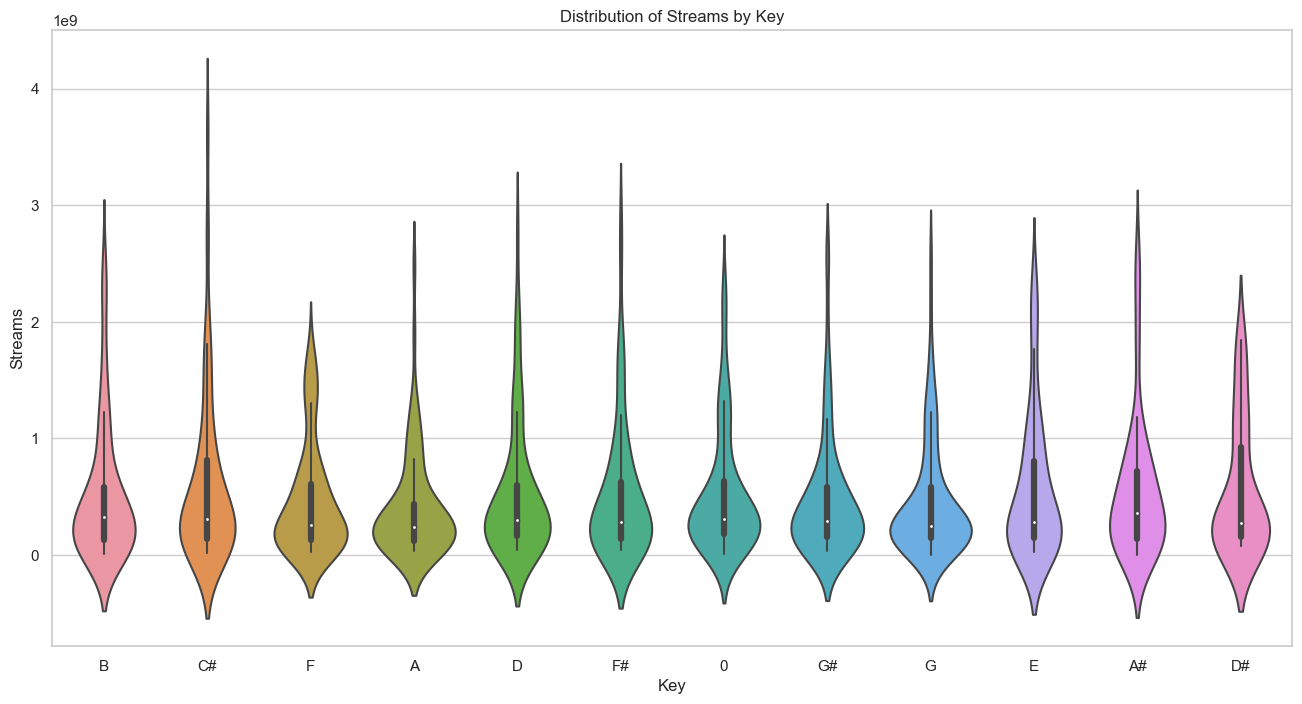

In [105]:
# Visualization 7: Violin Plot (for example, by Key)
plt.figure(figsize=(16, 8))
sns.violinplot(x='key', y='streams', data=df)
plt.title('Distribution of Streams by Key')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.show()

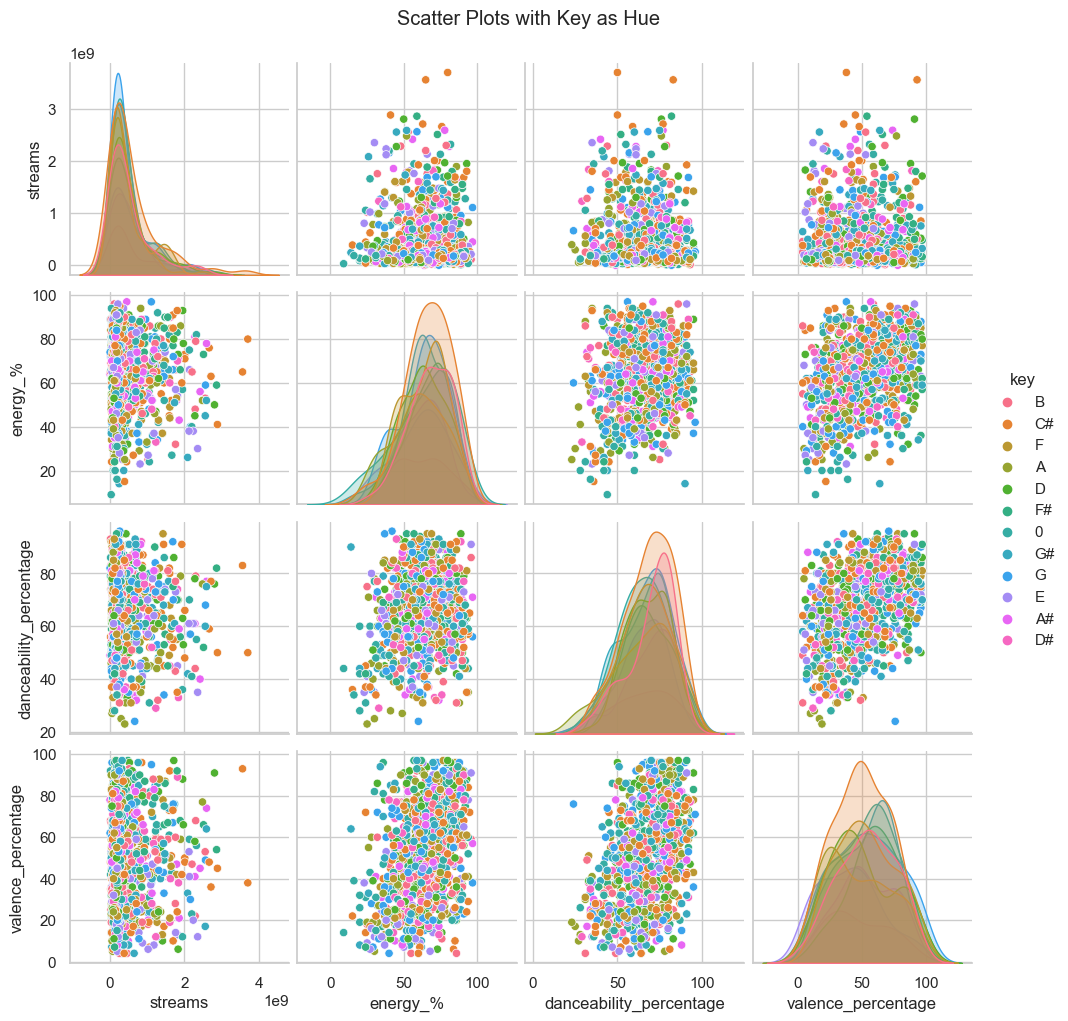

In [106]:
# Visualization 8: Pair Plots with Categorical Hue
sns.pairplot(df[['streams', 'energy_%', 'danceability_percentage', 'valence_percentage', 'key']], hue='key')
plt.suptitle('Scatter Plots with Key as Hue', y=1.02)
plt.show()

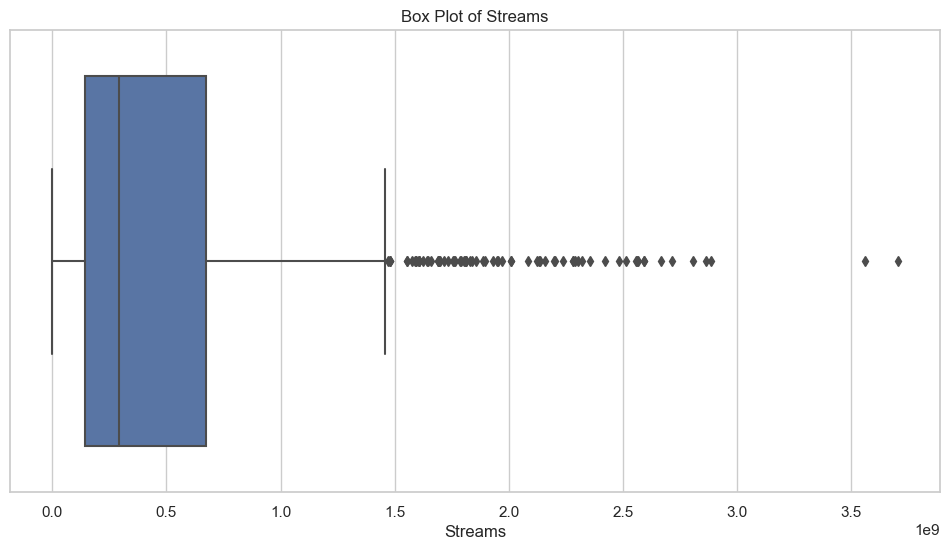

In [107]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='streams', data=df)
plt.title('Box Plot of Streams')
plt.xlabel('Streams')
plt.show()

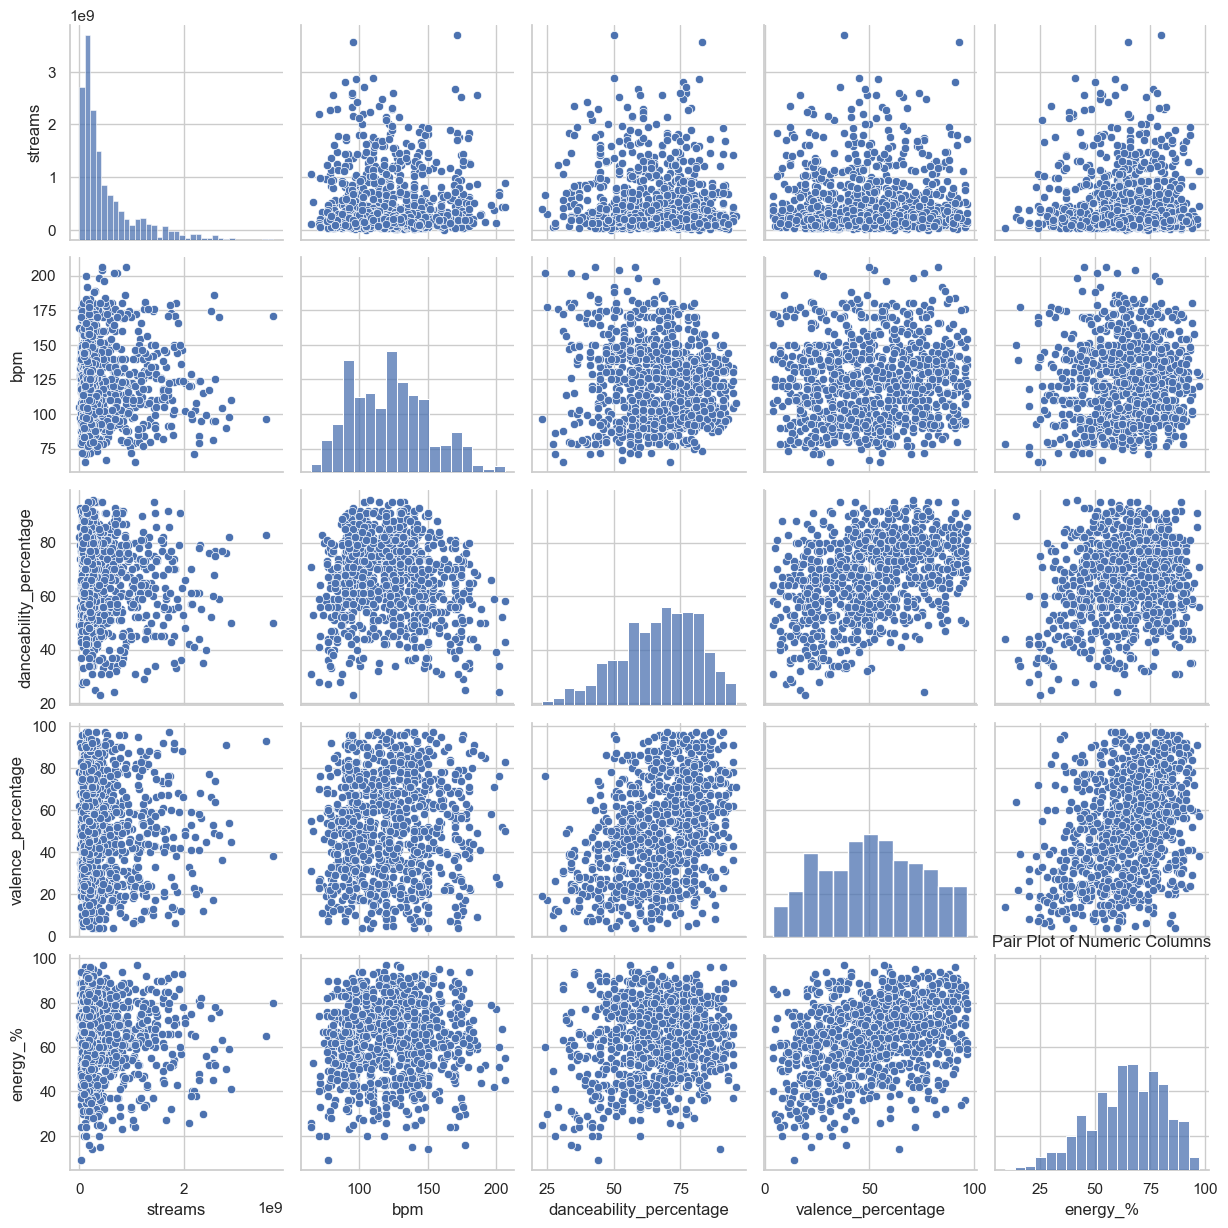

In [108]:
sns.pairplot(df[['streams', 'bpm', 'danceability_percentage', 'valence_percentage', 'energy_%']])
plt.title('Pair Plot of Numeric Columns')
plt.show()

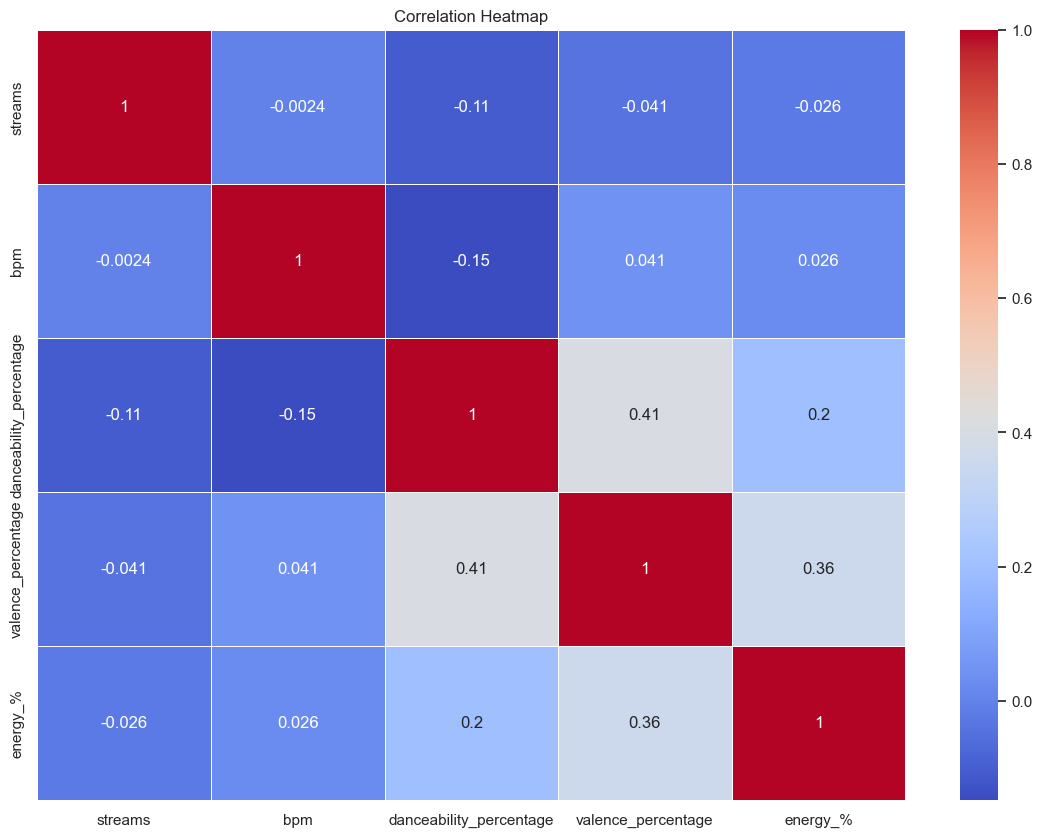

In [109]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[['streams', 'bpm', 'danceability_percentage', 'valence_percentage', 'energy_%']].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

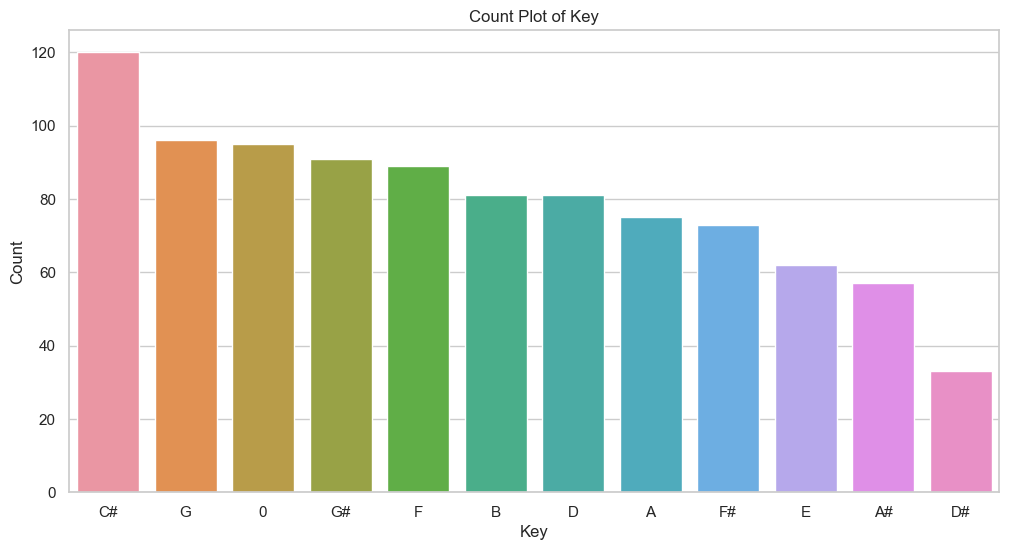

In [110]:
# Count Plot for Key:
plt.figure(figsize=(12, 6))
sns.countplot(x='key', data=df, order=df['key'].value_counts().index)
plt.title('Count Plot of Key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

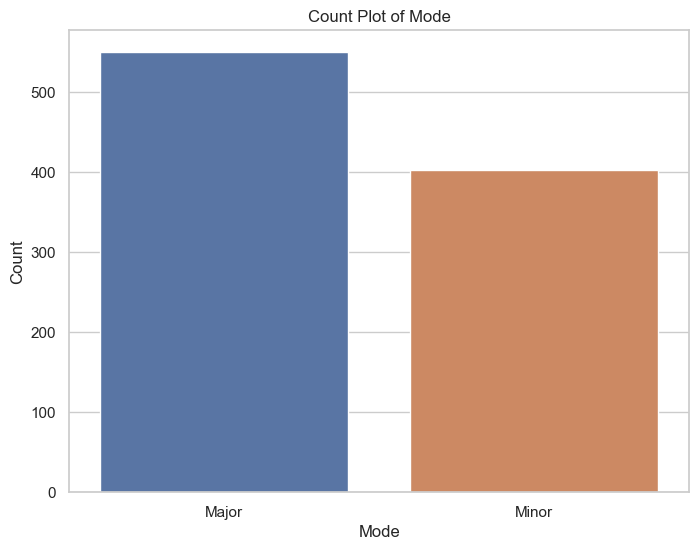

In [111]:
# Count Plot for Mode:
plt.figure(figsize=(8, 6))
sns.countplot(x='mode', data=df, order=df['mode'].value_counts().index)
plt.title('Count Plot of Mode')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

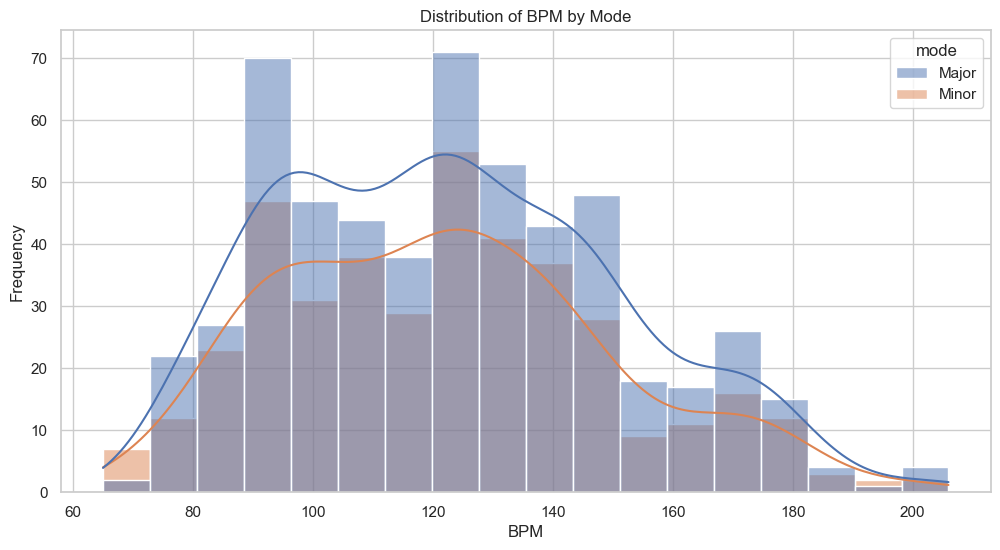

In [112]:
# Distribution of BPM by Mode:
plt.figure(figsize=(12, 6))
sns.histplot(x='bpm', data=df, hue='mode', kde=True)
plt.title('Distribution of BPM by Mode')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

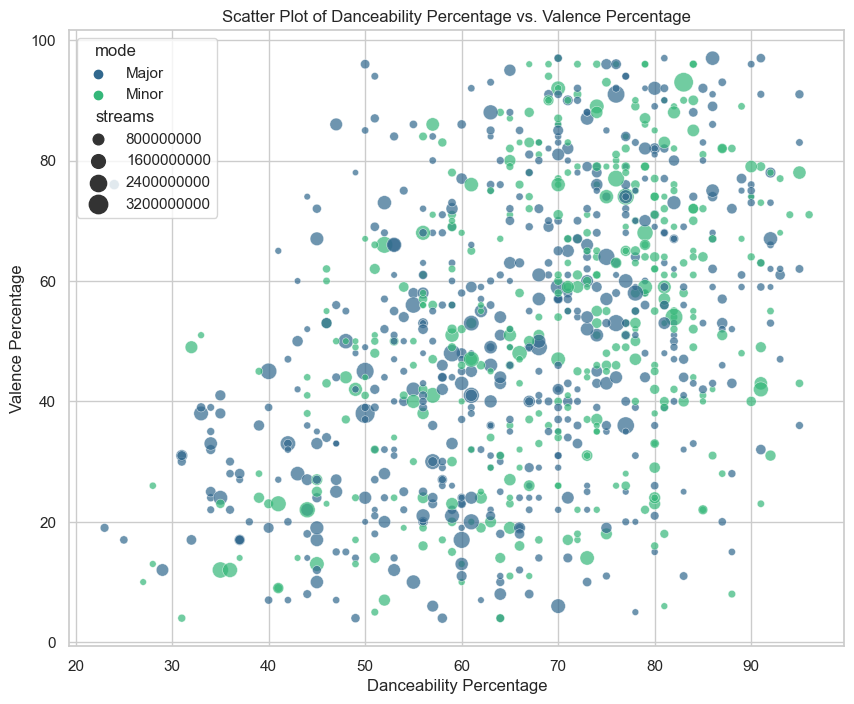

In [113]:
# Scatter Plot of Danceability Percentage vs. Valence Percentage:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='danceability_percentage', y='valence_percentage', data=df, hue='mode', size='streams', sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Danceability Percentage vs. Valence Percentage')
plt.xlabel('Danceability Percentage')
plt.ylabel('Valence Percentage')
plt.show()

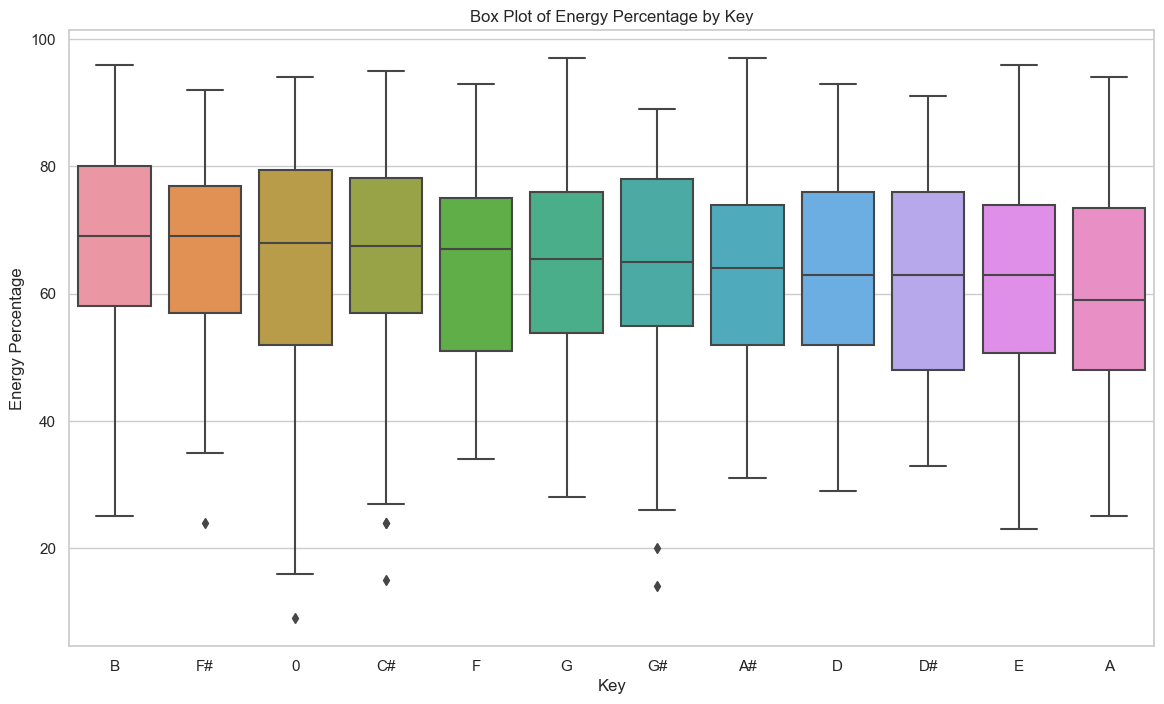

In [114]:
# Box Plot of Energy Percentage by Key:
plt.figure(figsize=(14, 8))
sns.boxplot(x='key', y='energy_%', data=df, order=df.groupby('key')['energy_%'].median().sort_values(ascending=False).index)
plt.title('Box Plot of Energy Percentage by Key')
plt.xlabel('Key')
plt.ylabel('Energy Percentage')
plt.show()

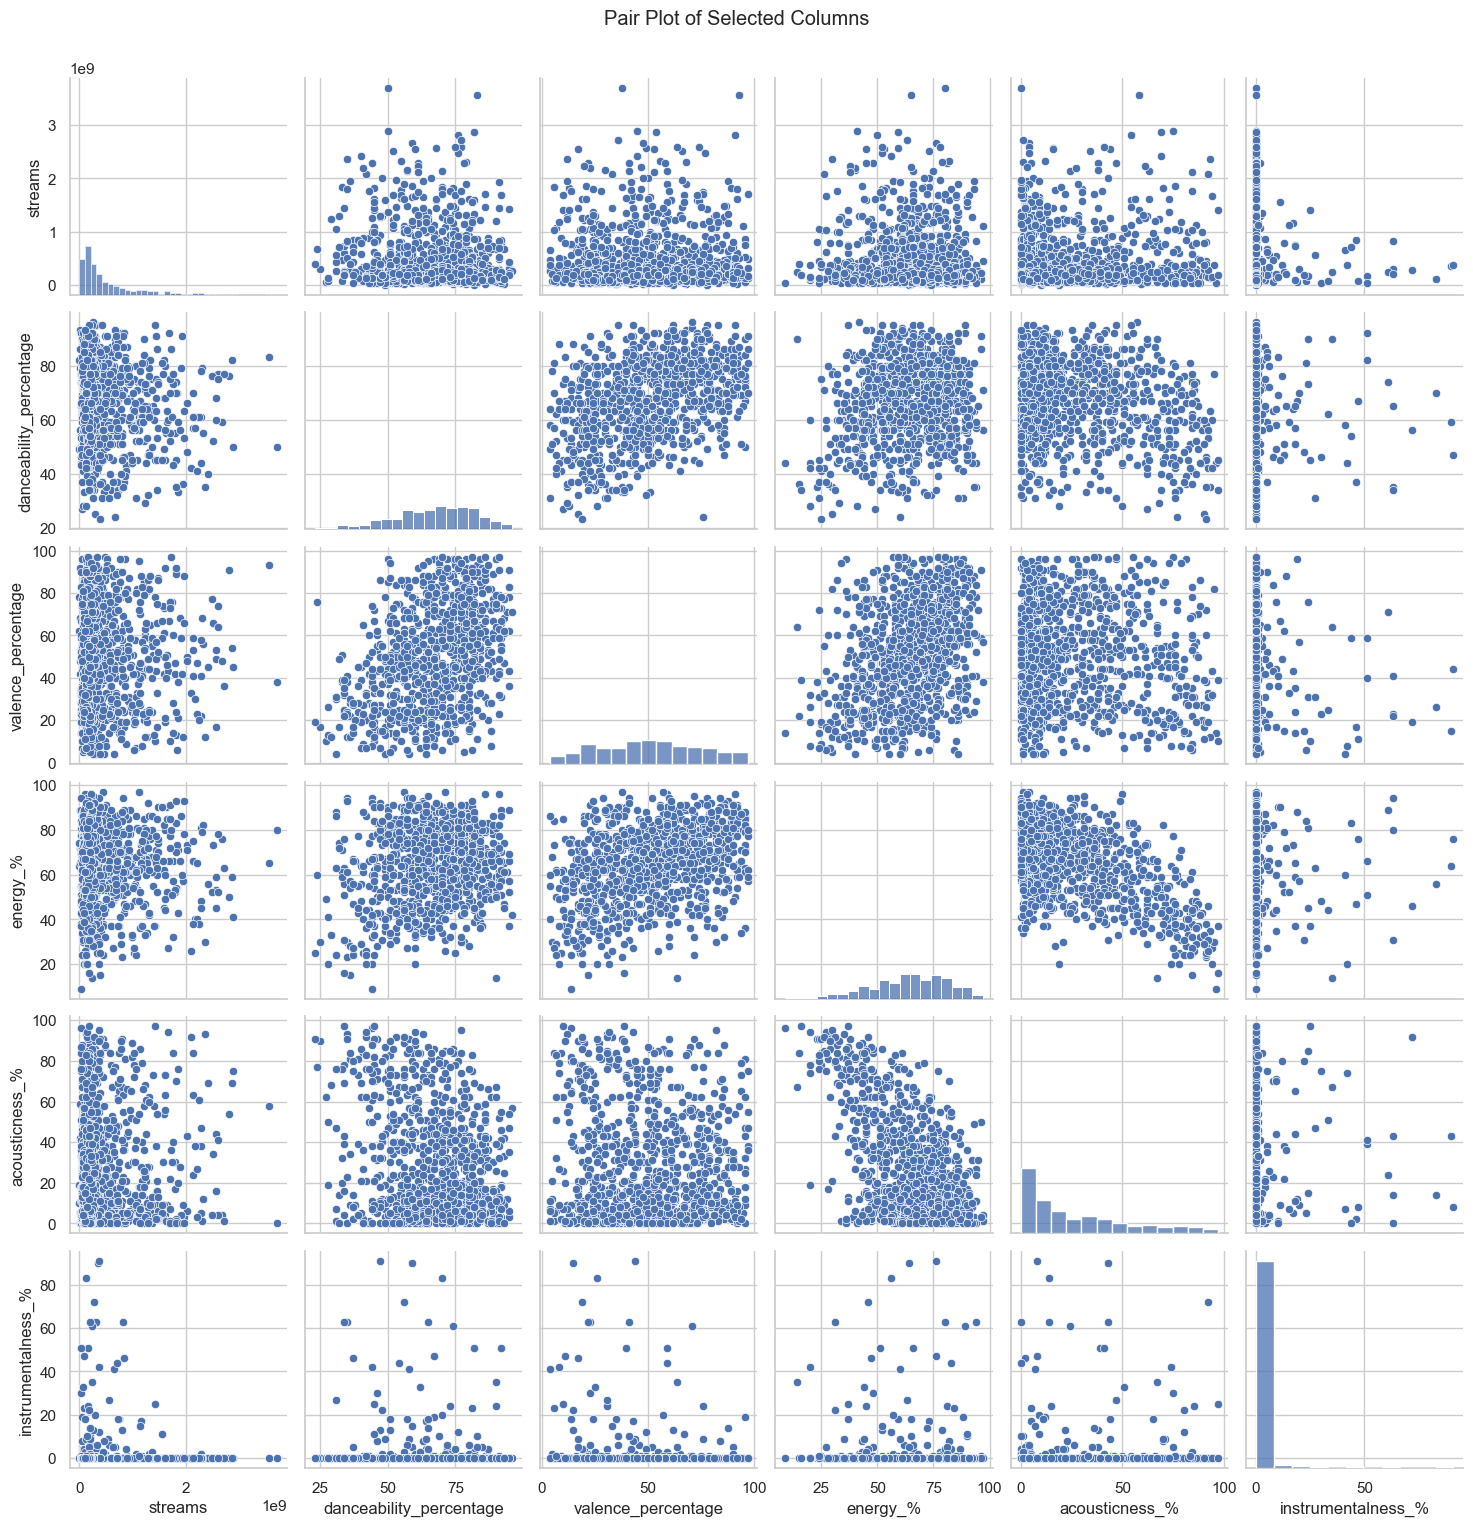

In [115]:
# Pair Plot for Selected Columns:
selected_columns = ['streams', 'danceability_percentage', 'valence_percentage', 'energy_%', 'acousticness_%', 'instrumentalness_%']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()

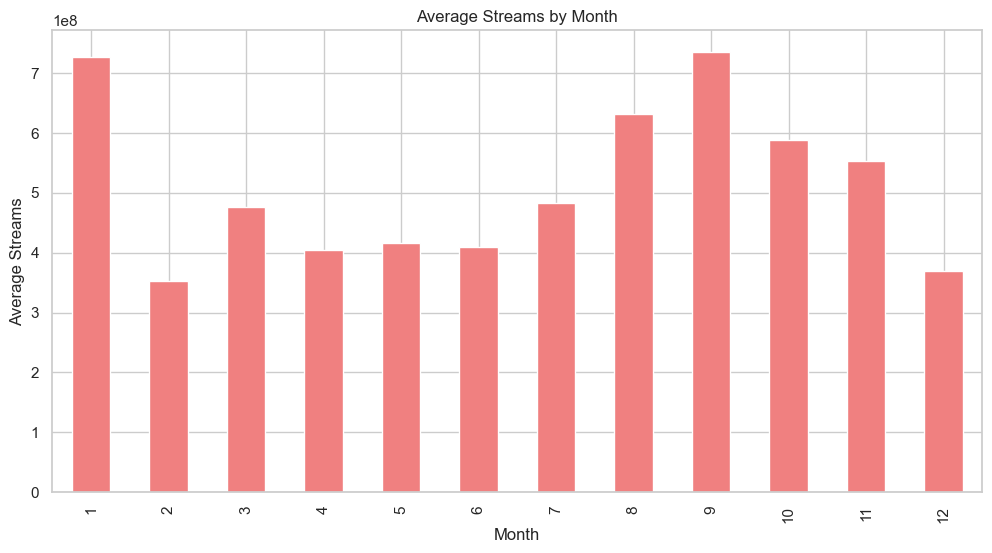

In [116]:
# Bar Plot of Average Streams by Month:
average_streams_by_month = df.groupby('released_month')['streams'].mean()
plt.figure(figsize=(12, 6))
average_streams_by_month.plot(kind='bar', color='lightcoral')
plt.title('Average Streams by Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')
plt.show()


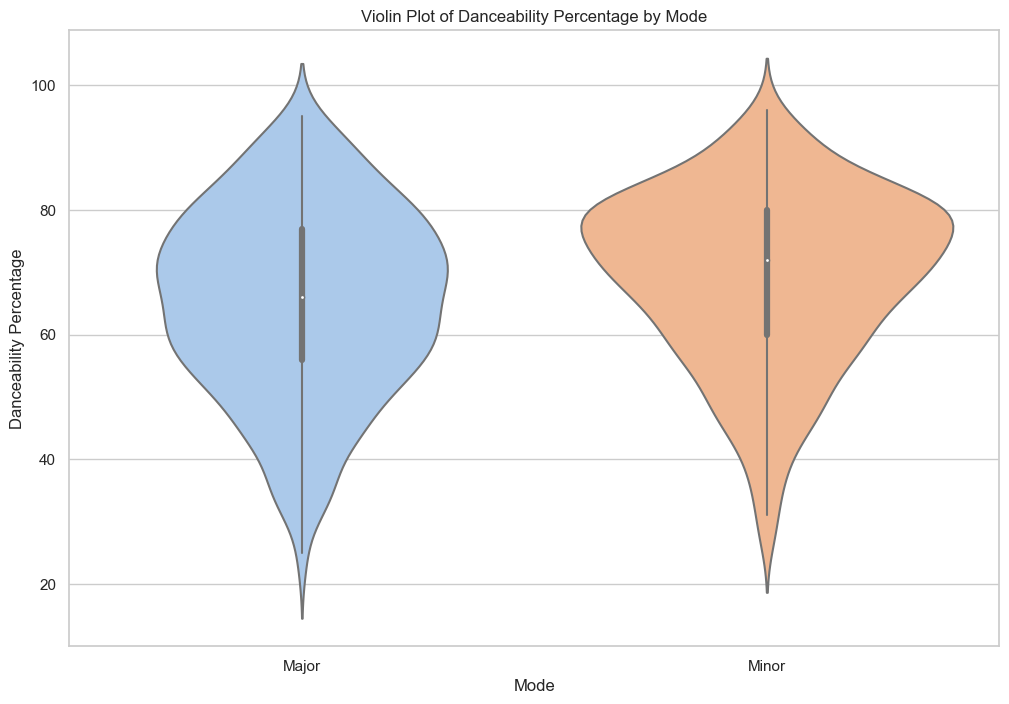

In [117]:
# Violin Plot of Danceability Percentage by Mode:
plt.figure(figsize=(12, 8))
sns.violinplot(x='mode', y='danceability_percentage', data=df, palette='pastel')
plt.title('Violin Plot of Danceability Percentage by Mode')
plt.xlabel('Mode')
plt.ylabel('Danceability Percentage')
plt.show()

# Conclusion:

The Spotify Track Prediction & Recommendation System project aimed to develop a Python-based solution for predicting Spotify metrics and providing personalized track recommendations to users. The analysis encompassed various aspects, feature engineering, recommendation system implementation, exploratory data analysis (EDA) and visualization.